In [24]:
import pandas as pd
import numpy as np
import statistics as st
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#Import Data
data = pd.read_csv("C:\\Users\\Abraham\\Documents\\abraham\\data mining - iup lab assistant\\master.csv")
data.head(6)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation


In [26]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [27]:
#Looking for missing value
np.sum(data.isnull())

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [29]:
#Renaming the column
data.rename(columns={"country":"Country","year":"Year","sex":"Gender","age":"Age","suicides_no":"Case Number",
                     "suicides/100k pop":"Suicides (100.000)","population":"Population",
                     "country-year":"Country-Year","HDI for year":"HDI", " gdp_for_year ($) ":"GDP",
                     "gdp_per_capita ($)":"GDP/Capita","generation":"Generation"},inplace=True)
data.head(6)

,Country,Year,Gender,Age,Case Number,Population,Suicides (100.000),Country-Year,HDI,GDP,GDP/Capita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation


In [6]:
#dropping the variable

data1 = data.drop("Country-Year", axis=1)
data1.head(6)

,Country,Year,Gender,Age,Case Number,Population,Suicides (100.000),HDI,GDP,GDP/Capita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,NaN,"2,156,624,900",796,G.I. Generation


In [7]:
#Getting specific value

data2 = data1[data1["Year"] >= 2010]
data2

,Country,Year,Gender,Age,Case Number,Population,Suicides (100.000),HDI,GDP,GDP/Capita,Generation
252,Albania,2010,male,55-74 years,20,241852,8.27,0.722,"11,926,953,259",4359,Silent
253,Albania,2010,male,35-54 years,20,371611,5.38,0.722,"11,926,953,259",4359,Generation X
254,Albania,2010,male,25-34 years,9,179720,5.01,0.722,"11,926,953,259",4359,Generation X
255,Albania,2010,male,75+ years,2,50767,3.94,0.722,"11,926,953,259",4359,Silent
256,Albania,2010,male,15-24 years,10,279508,3.58,0.722,"11,926,953,259",4359,Millenials
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,"63,067,077,179",2309,Generation Z


In [8]:
#Recounting the number of missing value
np.sum(data2.isnull())

Country                  0
Year                     0
Gender                   0
Age                      0
Case Number              0
Population               0
Suicides (100.000)       0
HDI                   1120
GDP                      0
GDP/Capita               0
Generation               0
dtype: int64

C:\Users\Abraham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


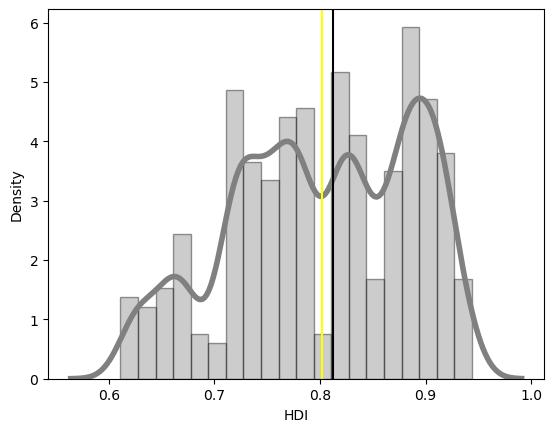

In [9]:
#Checking the histograms
sns.distplot(data2['HDI'], hist=True, kde=True, 
             color = 'grey', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(data2['HDI'].mean(),color='yellow') 
plt.axvline(data2['HDI'].median(),color='black')

In [10]:
#Changing the missing value with mean
data2['HDI'].mean()

0.8019620253164604

In [11]:
#Imputating with median
data2.HDI = data2.HDI.fillna(data2.HDI.mean())
data2

C:\Users\Abraham\AppData\Local\Temp\ipykernel_21176\963821692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.HDI = data2.HDI.fillna(data2.HDI.mean())


,Country,Year,Gender,Age,Case Number,Population,Suicides (100.000),HDI,GDP,GDP/Capita,Generation
252,Albania,2010,male,55-74 years,20,241852,8.27,0.722,"11,926,953,259",4359,Silent
253,Albania,2010,male,35-54 years,20,371611,5.38,0.722,"11,926,953,259",4359,Generation X
254,Albania,2010,male,25-34 years,9,179720,5.01,0.722,"11,926,953,259",4359,Generation X
255,Albania,2010,male,75+ years,2,50767,3.94,0.722,"11,926,953,259",4359,Silent
256,Albania,2010,male,15-24 years,10,279508,3.58,0.722,"11,926,953,259",4359,Millenials
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,"63,067,077,179",2309,Generation Z


In [12]:
np.sum(data2.isnull())

Country               0
Year                  0
Gender                0
Age                   0
Case Number           0
Population            0
Suicides (100.000)    0
HDI                   0
GDP                   0
GDP/Capita            0
Generation            0
dtype: int64

In [13]:
#OUTLIER
from scipy import stats
z = np.abs(stats.zscore(data2._get_numeric_data()))

#Getting non-outlier data from all variables
data3 = data2[(z<3).all(axis=1)]
data3

,Country,Year,Gender,Age,Case Number,Population,Suicides (100.000),HDI,GDP,GDP/Capita,Generation
252,Albania,2010,male,55-74 years,20,241852,8.27,0.722,"11,926,953,259",4359,Silent
253,Albania,2010,male,35-54 years,20,371611,5.38,0.722,"11,926,953,259",4359,Generation X
254,Albania,2010,male,25-34 years,9,179720,5.01,0.722,"11,926,953,259",4359,Generation X
255,Albania,2010,male,75+ years,2,50767,3.94,0.722,"11,926,953,259",4359,Silent
256,Albania,2010,male,15-24 years,10,279508,3.58,0.722,"11,926,953,259",4359,Millenials
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,"63,067,077,179",2309,Generation Z


In [15]:
#Type data
data3.dtypes

Country                object
Year                   object
Gender                 object
Age                    object
Case Number             int64
Population              int64
Suicides (100.000)    float64
HDI                   float64
GDP                     int64
GDP/Capita              int64
Generation             object
dtype: object

In [14]:
#Merubah tipe data
data3['Year'] = data3['Year'].astype('str')
data3['GDP'] = [int(float(str(i).replace(",", ""))) for i in data3["GDP"]]
data3.dtypes

C:\Users\Abraham\AppData\Local\Temp\ipykernel_21176\3814112906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Year'] = data3['Year'].astype('str')
C:\Users\Abraham\AppData\Local\Temp\ipykernel_21176\3814112906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['GDP'] = [int(float(str(i).replace(",", ""))) for i in data3["GDP"]]


Country                object
Year                   object
Gender                 object
Age                    object
Case Number             int64
Population              int64
Suicides (100.000)    float64
HDI                   float64
GDP                     int64
GDP/Capita              int64
Generation             object
dtype: object

In [16]:
data3.describe() #For numerical/continuous features

,Case Number,Population,Suicides (100.000),HDI,GDP,GDP/Capita
count,5409.000000,5.409000e+03,5409.000000,5409.000000,5.409000e+03,5409.000000
mean,132.561656,1.430347e+06,9.201950,0.798899,4.549816e+11,24437.847476
std,305.524595,2.304440e+06,11.398108,0.076251,1.014800e+12,21907.856699
min,0.000000,9.390000e+02,0.000000,0.611000,6.761294e+08,991.000000
25%,3.000000,1.206980e+05,0.900000,0.751000,2.138615e+10,7885.000000
50%,22.000000,4.868140e+05,4.850000,0.801962,1.017263e+11,15073.000000
75%,105.000000,1.464302e+06,13.360000,0.859000,3.918927e+11,37528.000000
max,2617.000000,1.455040e+07,59.590000,0.940000,1.812071e+13,93638.000000


In [17]:
data3.describe(exclude = np.number) #For categorical features

,Country,Year,Gender,Age,Generation
count,5409,5409,5409,5409,5409
unique,92,7,2,6,5
top,Czech Republic,2010,female,15-24 years,Millenials
freq,82,985,2784,934,1690


In [18]:
#Pivot table
delivery_pivot1=pd.pivot_table(data3,index=["Country"],
                               values=['HDI','GDP'],
                               aggfunc=[np.mean], margins=True)
delivery_pivot1

mean          
                              GDP       HDI
Country                                    
Albania              1.192695e+10  0.722000
Antigua and Barbuda  1.262333e+09  0.786741
Argentina            5.288112e+11  0.821827
Armenia              1.055041e+10  0.747258
Aruba                2.526084e+09  0.801962
...                           ...       ...
United Kingdom       2.728529e+12  0.886494
United States        1.626311e+13  0.895852
Uruguay              5.191808e+10  0.790592
Uzbekistan           5.156541e+10  0.666200
All                  4.549816e+11  0.798899

[93 rows x 2 columns]

In [19]:
#Pivot table
delivery_pivot2=pd.pivot_table(data3,index=["Generation","Gender"],
                               values=['Population'],
                               aggfunc=[np.sum], margins=True)
delivery_pivot2

sum
                     Population
Generation   Gender            
Boomers      female   632021426
             male     546870000
Generation X female  1118720911
             male    1020044269
Generation Z female   584615977
             male     613503104
Millenials   female  1203460662
             male    1146672451
Silent       female   571637656
             male     299198676
All                  7736745132

In [20]:
data4 = data3.drop("Gender", axis=1)
data4 = data4.drop("Age", axis=1)
data4 = data4.drop("Generation", axis=1)
data4 = data4.drop("Year",axis=1)

In [21]:
data5 = data4.groupby("Country").sum()
m=data5.groupby("Country").mean()
data5["HDI"]=m["HDI"]
data5["GDP"]=(m["GDP"]/1000000000)
data5["GDP/Capita"]=m["GDP/Capita"]
data5["Suicides (100.000)"]=(data5["Suicides (100.000)"]*100000)
data5["Population"]=(data5["Population"]/1000)
data5.head(6)

,Case Number,Population,Suicides (100.000),HDI,GDP,GDP/Capita
Country,,,,,,
Albania,96,2736.025,4166000.0,8.664000,143.123439,52308.0
Antigua and Barbuda,1,361.208,1562000.0,37.763544,60.592002,670680.0
Argentina,18394,231871.275,66383000.0,59.171544,38074.406145,984108.0
Armenia,485,18969.952,27029000.0,61.275165,865.133744,312740.0
Aruba,16,190.494,15207000.0,19.247089,60.626011,636480.0
Australia,15918,128736.918,84746000.0,65.507544,101635.660472,4735764.0


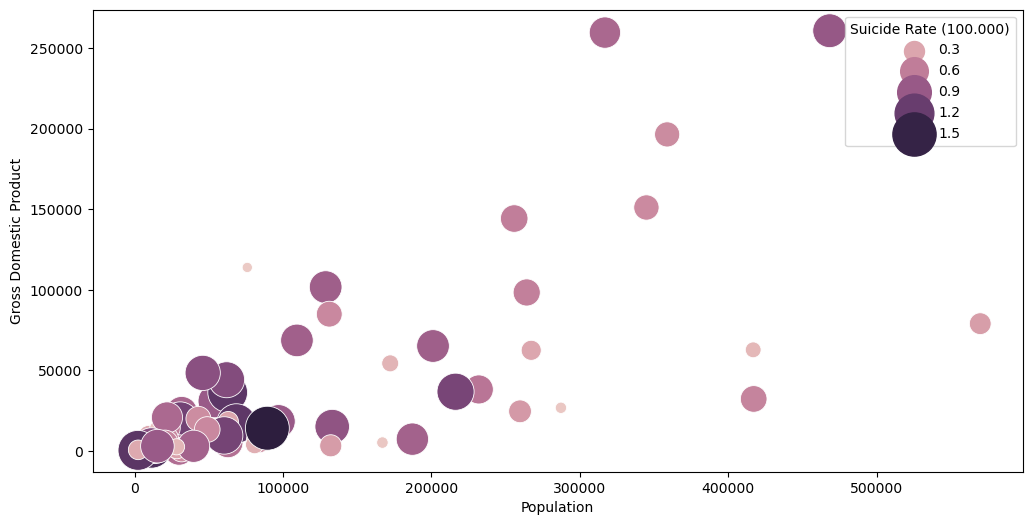

In [22]:
#Bubble plot suicide ratio vs GDP vs population
plt.figure(figsize=(12,6))
sns.scatterplot(x="Population",y="GDP",size="Suicides (100.000)",hue="Suicides (100.000)",data=data5,sizes=(20,1000),legend=True)
plt.ylabel("Gross Domestic Product")
plt.legend(title="Suicide Rate (100.000)")
plt.savefig("bubble1.png")
plt.show()

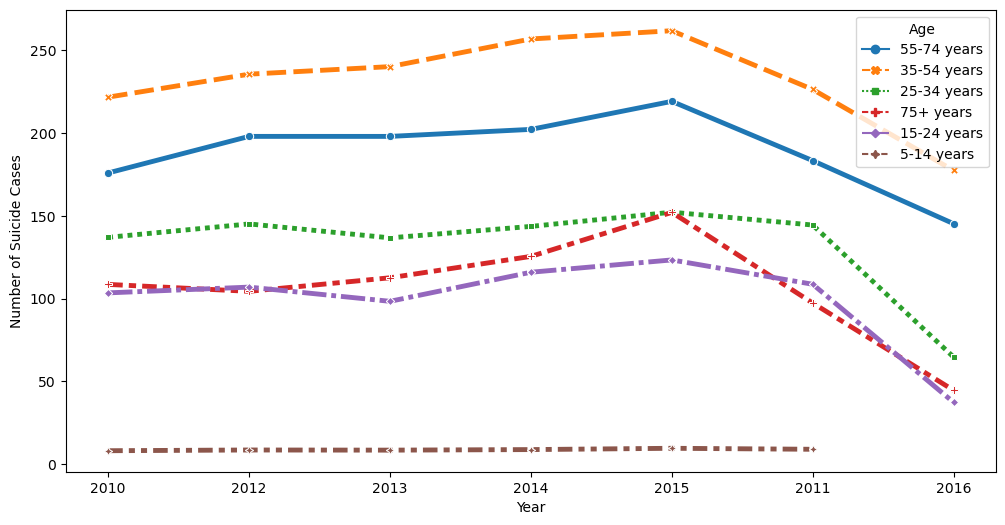

<Figure size 640x480 with 0 Axes>

In [23]:
#Lineplot age vs number of suicide cases
plt.figure(figsize=(12,6))
sns.lineplot(x="Year",y="Case Number",data=data3,hue="Age",style="Age",linewidth=3.5,markers=True,ci=None)
plt.ylabel("Number of Suicide Cases")
plt.show()
plt.savefig("lineplot.png",dpi=1200)